# xls 파일 pandas로 읽기

In [1]:
import pandas as pd
import coredotdata as cdd
cdd.download_dataset("86B8msc3", target_directory='./data/')

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  6.25it/s]


In [2]:
cdd.download_dataset?

In [4]:
pd.read_excel?

위 코드를 실행하면 다음과 같은 설명을 볼 수 있습니다.

engine : str, default None
    If io is not a buffer or path, this must be set to identify io.
    Supported engines: "xlrd", "openpyxl", "odf", "pyxlsb".
    Engine compatibility :

    - "xlrd" supports old-style Excel files (.xls).
    - "openpyxl" supports newer Excel file formats.
    - "odf" supports OpenDocument file formats (.odf, .ods, .odt).
    - "pyxlsb" supports Binary Excel files.

old style의 엑셀파일 xls의 경우 engine을 xlrd로 설정해야합니다.

In [3]:
pd.read_excel('./data/KOBIS_범죄도시지역별_2022-08-16.xls', engine='xlrd')

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'\n\n\n\n\n\n\n\n'

하지만 에러가 발생합니다.

에러 메세지는 XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'\n\n\n\n\n\n\n\n' 입니다.

해당 메세지로 구글에 검색해보면

어느 블로거가 한글로 잘 정리 해 놓은 [글이 있습니다](https://blog.naver.com/jin31200/221355318078). 

위 글에서는 xls파일을 xlsx파일로 변환합니다.

해당 과정에서 win32com이라는 라이브러리를 사용하는데 mac에서는 호환이 안된다고 합니다.<br> ~~출처 : stackoverflow~~

---

# Stackoverflow 도움받기

[이 글](https://stackoverflow.com/questions/16504975/error-unsupported-format-or-corrupt-file-expected-bof-record)에서는 xlsx파일을 열지 못했습니다. 하지만 error 메세지가 동일하기 때문에 도움을 받을 수 있을 것 같습니다.

45개의 추천을 받은 답변을 따라해봤습니다.

질문자는 xlsx인데 .csv를 읽을 때 read_csv를 사용하라고 합니다.

뭔가 이상하지만 따라해봅니다.

In [4]:
pd.read_csv('./data/KOBIS_범죄도시지역별_2022-08-16.xls')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 15, saw 5


될리가 없습니다.

여러 답변을 읽다가 2개의 추천을 받은 글을 발견했습니다.

In my case, someone gave me an Excel file ending with extension ".xls". I tried parsing it with xlrd, and got this error:

```xlrd.biffh.XLRDError: Unsupported format, or corrupt file: Expected BOF record; found "blar blar blar"```
<p>
After working some time, I found that .xls file actually is a text file. The sender didn't bother to create a real Excel binary file but just put ".xls" to a text file.
<p>
Maybe it's worth opening the file with text editor to make sure it is an Excel file. This could have saved me one hour.

이 분은 .xls 파일이 사실은 text파일이었다는 것을 발견했다고 합니다.

real Excel binary 파일이 아닌 그냥 .xls로 존재하는 text file이라고 하네요.

이 글을 보고나니 위의 11개 추천수를 받은 답변이 눈에 들어오네요.

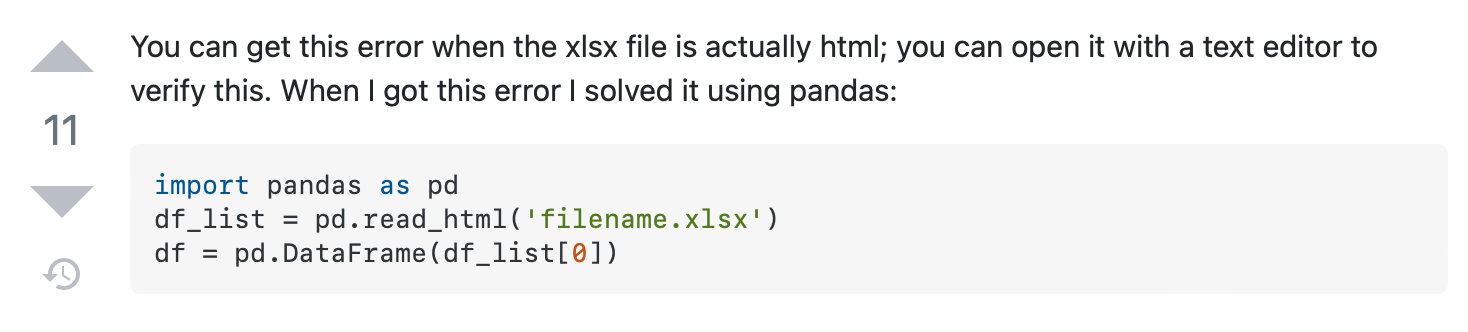

따라해봅시다.

In [5]:
li = pd.read_html('./data/KOBIS_범죄도시지역별_2022-08-16.xls')

In [6]:
df = pd.DataFrame(li[0])

In [7]:
df

,0,1,2,3
0,â 'ë²ì£ëì' KOBIS ì§ì­ë³ íµê³ì ë³´,â 'ë²ì£ëì' KOBIS ì§ì­ë³ íµê³ì ë³´,â 'ë²ì£ëì' KOBIS ì§ì­ë³ íµê³ì ë³´,â 'ë²ì£ëì' KOBIS ì§ì­ë³ íµê³ì ë³´
1,- ì¡°íì¼: 2022-08-16,- ì¡°íì¼: 2022-08-16,- ì¡°íì¼: 2022-08-16,- ì¡°íì¼: 2022-08-16
2,- ì¶ì²: ìíì§í¥ììí íµí©ì ì°ë§...,- ì¶ì²: ìíì§í¥ììí íµí©ì ì°ë§...,- ì¶ì²: ìíì§í¥ììí íµí©ì ì°ë§...,- ì¶ì²: ìíì§í¥ììí íµí©ì ì°ë§...


뭔가 이상합니다.

In [8]:
pd.read_html?

encoding : str, optional
    The encoding used to decode the web page. Defaults to ``None``.``None``
    preserves the previous encoding behavior, which depends on the
    underlying parser library (e.g., the parser library will try to use
    the encoding provided by the document).

인코딩 속성을 사용해서 'utf-8'로 읽어보겠습니다.

In [9]:
li = pd.read_html('./data/KOBIS_범죄도시지역별_2022-08-16.xls', encoding='utf-8')
df = pd.DataFrame(li[0])
df

,0,1,2,3
0,■ '범죄도시' KOBIS 지역별 통계정보,■ '범죄도시' KOBIS 지역별 통계정보,■ '범죄도시' KOBIS 지역별 통계정보,■ '범죄도시' KOBIS 지역별 통계정보
1,- 조회일: 2022-08-16,- 조회일: 2022-08-16,- 조회일: 2022-08-16,- 조회일: 2022-08-16
2,- 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr),- 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr),- 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr),- 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr)


이번에는 잘 읽히네요.<br>
하지만 원하는 정보가 아닙니다.

In [10]:
li

[                                              0  \
 0                       ■ '범죄도시' KOBIS 지역별 통계정보   
 1                             - 조회일: 2022-08-16   
 2  - 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr)   
 
                                               1  \
 0                       ■ '범죄도시' KOBIS 지역별 통계정보   
 1                             - 조회일: 2022-08-16   
 2  - 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr)   
 
                                               2  \
 0                       ■ '범죄도시' KOBIS 지역별 통계정보   
 1                             - 조회일: 2022-08-16   
 2  - 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr)   
 
                                               3  
 0                       ■ '범죄도시' KOBIS 지역별 통계정보  
 1                             - 조회일: 2022-08-16  
 2  - 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr)  ,
       지역  스크린수              누적매출액(점유율)         누적관객수(점유율)
 0    서울시   252  14,205,532,449 (25.2%)  1,689,104 (24.5%)
 1    경기도   326  13,337,118,300 (23.7%)  1,621,

0번 째에는 파일에 대한 정보, 1번 째에는 원하는 정보가 담겨있네요

In [11]:
li = pd.read_html('./data/KOBIS_범죄도시지역별_2022-08-16.xls', encoding='utf-8')
li[1]

,지역,스크린수,누적매출액(점유율),누적관객수(점유율)
0,서울시,252,"14,205,532,449 (25.2%)","1,689,104 (24.5%)"
1,경기도,326,"13,337,118,300 (23.7%)","1,621,623 (23.6%)"
2,강원도,56,"1,358,383,200 (2.4%)","177,667 (2.6%)"
3,충청북도,32,"1,454,685,500 (2.6%)","182,534 (2.7%)"
4,충청남도,49,"1,805,677,200 (3.2%)","226,120 (3.3%)"
5,경상북도,57,"2,001,687,500 (3.6%)","248,233 (3.6%)"
6,경상남도,72,"2,923,019,200 (5.2%)","368,475 (5.4%)"
7,전라북도,50,"1,504,489,700 (2.7%)","190,727 (2.8%)"
8,전라남도,39,"1,033,174,800 (1.8%)","141,114 (2.1%)"
9,제주도,17,"583,694,000 (1.0%)","71,099 (1.0%)"


완성입니다 :)